In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [98]:

train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
len(train_data)
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [44]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
len(train_data)

891

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:

test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
len(test_data)


418

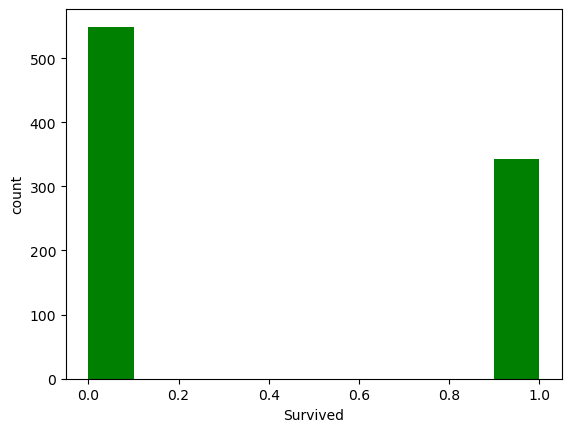

In [49]:

fig, ax = plt.subplots()
plt.hist(train_data['Survived'],color='green')
ax.set_xlabel("Survived")
ax.set_ylabel('count')
plt.show()

In [50]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [51]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [52]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has the most Null Values


In [53]:
train_data['Age'].isnull().sum()/891 *100

19.865319865319865

In [54]:
train_data['Cabin'].isnull().sum()/891 *100

77.10437710437711

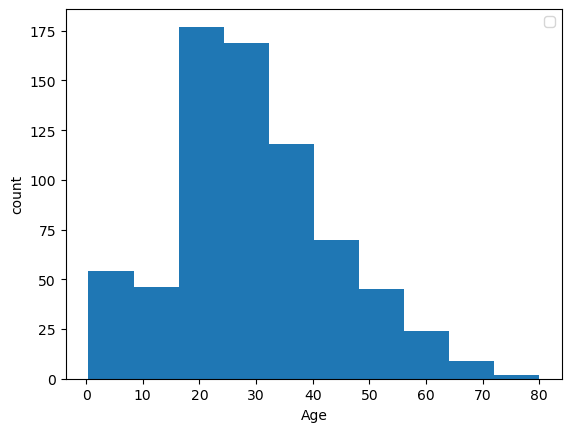

In [55]:
fig, ax = plt.subplots()
ax.hist(train_data["Age"])
ax.set_xlabel("Age")
ax.set_ylabel('count')
ax.legend()
plt.show()
plt.show()

In [56]:
train_data['Age'].mean()

29.69911764705882

In [57]:
train_data.fillna(train_data['Age'].mean(),inplace=True)

In [58]:
train_data['Age'].isnull().sum()

0

In [59]:
train_data.drop(['Name','Sex','Ticket','Fare'],axis=1,inplace=True)

In [60]:
train_data.drop('Embarked',axis=1,inplace=True)

In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin
0,1,0,3,22.0,1,0,29.699118
1,2,1,1,38.0,1,0,C85
2,3,1,3,26.0,0,0,29.699118
3,4,1,1,35.0,1,0,C123
4,5,0,3,35.0,0,0,29.699118


In [114]:
X=train_data[['PassengerId','Pclass','Age','Parch','SibSp']]
y=train_data['Survived']

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)


0.6816143497757847

In [126]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': predictions})
print(output.head())

ValueError: array length 223 does not match index length 418